# Chapter 10: Logistic Regression


## Import required packages

In [15]:
%matplotlib inline

from pathlib import Path

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
#from mord import LogisticIT #If you're looking for ordinal multi-class (more than 2 levels)
import matplotlib.pylab as plt
import seaborn as sns
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score
from scipy import stats
import math


Load the `UniversalBank.csv` dataset. The columns `ID` and `ZIP Code` are not relevant for model building and therefore removed. Treat Education as categorical

In [4]:
#Load the dataset
bank_df = pd.read_csv('UniversalBank.csv')

#Drop ID and Zipcode columns
bank1_df=bank_df.drop(columns=['ZIP Code','ID'])

# Treat education as categorical, 
bank1_df.Education = bank1_df.Education.astype('category')
bank1_df.head()


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [5]:
#Rename the categorical levels
new_categories = {1: 'Undergrad', 2: 'Graduate', 3: 'Advanced/Professional'}
bank1_df.Education.cat.rename_categories(new_categories, inplace=True)
bank1_df.head()


C:\Users\dy5794\AppData\Local\Temp\ipykernel_2948\322684980.py:3: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  bank1_df.Education.cat.rename_categories(new_categories, inplace=True)


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,Undergrad,0,0,1,0,0,0
1,45,19,34,3,1.5,Undergrad,0,0,1,0,0,0
2,39,15,11,1,1.0,Undergrad,0,0,0,0,0,0
3,35,9,100,1,2.7,Graduate,0,0,0,0,0,0
4,35,8,45,4,1.0,Graduate,0,0,0,0,0,1


In [7]:
#convert to dummy variables
bank1_df = pd.get_dummies(bank1_df, drop_first=True)
bank1_df.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Graduate,Education_Advanced/Professional
0,25,1,49,4,1.6,0,0,1,0,0,0,0,0
1,45,19,34,3,1.5,0,0,1,0,0,0,0,0
2,39,15,11,1,1.0,0,0,0,0,0,0,0,0
3,35,9,100,1,2.7,0,0,0,0,0,0,1,0
4,35,8,45,4,1.0,0,0,0,0,0,1,1,0


In [13]:


#Separate X and y variables
#X is income
#y is credit card
X = bank1_df['Income']
y = bank1_df['CreditCard']
logit_reg = sm.GLM(y, X, family=sm.families.Binomial())

#Fit and print results
logit_reg.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             CreditCard   No. Observations:                 5000
Model:                            GLM   Df Residuals:                     4999
Model Family:                Binomial   Df Model:                            0
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3141.8
Date:                Thu, 16 Nov 2023   Deviance:                       6283.6
Time:                        20:48:54   Pearson chi2:                 5.09e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           -0.04638
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Income        -0.0090      0.000    -23.559      0.000      -0.010      -0.008
==============================================================================
"""

In [17]:
math.exp(-0.009) #If income increases by 1$, odds of the person getting a credit card increase by 0.99

0.9910403787728836

In [17]:
#convert to dummy variables


#Separate X and y variables


logit_reg = sm.GLM(y, X, family=sm.families.Binomial())

#Fit and print results




                 Generalized Linear Model Regression Results                  
Dep. Variable:          Personal_Loan   No. Observations:                 5000
Model:                            GLM   Df Residuals:                     4988
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -607.87
Date:                Wed, 02 Nov 2022   Deviance:                       1215.7
Time:                        21:01:45   Pearson chi2:                 1.63e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3224
Covariance Type:            nonrobust                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Age       

In [19]:
bank1_df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Education_Graduate', 'Education_Advanced/Professional'],
      dtype='object')

In [20]:
#Use Personal Loan as y
# partition data
#Separate X and y variables
predictors =['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education_Graduate', 'Education_Advanced/Professional',
       'Mortgage', 'Securities Account', 'CD Account', 'Online']
outcome = 'Personal Loan'


#Partition
X = bank1_df[predictors]
y = bank1_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)



In [22]:
# fit a logistic regression (set penalty=l2 (a penalty of L2 will force some coefficients to be small, 
#essentially focusing on a fewer variables) and C=1e42 avoids regularization, C denotes how strong we want 
#regularization to be. A smaller C will make regularization stronger ) Lasso regression
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)

#Get intercepts, coefficients, and AIC (Akaike Intuitive Criterion)
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print() #Creates a Line space
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1))

intercept  -12.82268469706311
            Age  Experience    Income    Family     CCAvg  Education_Graduate  \
coeff -0.035061    0.037208  0.058773  0.607038  0.237946            4.253051   

       Education_Advanced/Professional  Mortgage  Securities Account  \
coeff                         4.345084  0.001026           -0.801188   

       CD Account    Online  
coeff    2.921178 -0.561679  

AIC -522.7780468011943


## Prediction
Predict to get the probabilities

In [23]:
logit_reg_pred = logit_reg.predict(valid_X)
logit_reg_proba = logit_reg.predict_proba(valid_X)
logit_result = pd.DataFrame({'actual': valid_y, 
                             'p(0)': [p[0] for p in logit_reg_proba],
                             'p(1)': [p[1] for p in logit_reg_proba],
                             'predicted': logit_reg_pred })

# display four different cases
interestingCases = [2764, 932, 2721, 702]
print(logit_result.loc[interestingCases])

      actual      p(0)      p(1)  predicted
2764       0  0.954207  0.045793          0
932        0  0.261696  0.738304          1
2721       1  0.037325  0.962675          1
702        1  0.989395  0.010605          0


## Obtain Confusion Matrix

In [24]:
#Use the classification summary function for training and validation data
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.9555)

       Prediction
Actual    0    1
     0 1789   18
     1   71  122


In [41]:
#I use a higher cutoff here, so my specificity increses and I identify more 0s
newpred = logit_reg_proba[:,1]>0.6
classificationSummary(valid_y, newpred)

Confusion Matrix (Accuracy 0.9545)

       Prediction
Actual    0    1
     0 1797   10
     1   81  112


In [42]:
#I use a lower cutoff here, so my sensitivity increses and I identify more 1s
newpred = logit_reg_proba[:,1]>0.3
classificationSummary(valid_y, newpred)

Confusion Matrix (Accuracy 0.9545)

       Prediction
Actual    0    1
     0 1765   42
     1   49  144


## Gains chart and Decile-wise lift chart

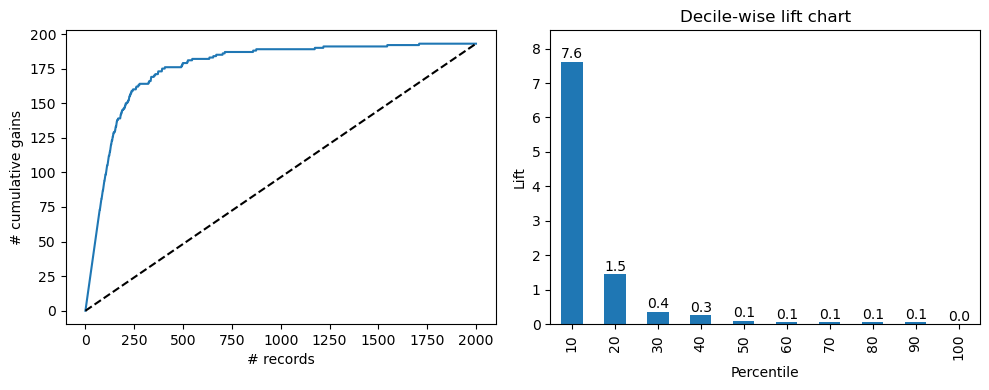

In [30]:
df = logit_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

gainsChart(df.actual, ax=axes[0])
liftChart(df.actual, title='Decile-wise lift chart', ax=axes[1])
    
plt.tight_layout()
plt.show()

In [2]:
#Explore Flight Delays data and use logit for that dataset